<a href="https://colab.research.google.com/github/abdulwasaeee/Support-Vector-Machines/blob/main/SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [3]:
x,y=make_classification(n_samples=1000,n_features=2,n_classes=3,n_clusters_per_class=1,n_redundant=0)

In [4]:
x

array([[-2.2362069 , -1.82032356],
       [-0.24496978,  0.50893015],
       [ 0.71026661, -0.78934196],
       ...,
       [-1.74510836, -1.17282082],
       [-0.6572503 , -1.13813836],
       [ 1.27141979,  1.46741317]])

<Axes: xlabel='0', ylabel='1'>

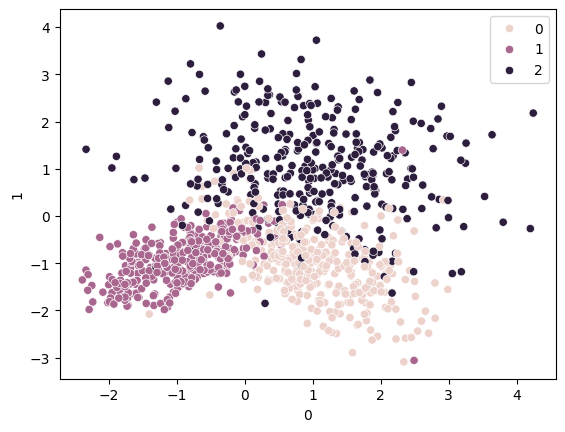

In [5]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


In [7]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [8]:
y_pred=svc.predict(x_test)

In [9]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [10]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        80
           1       0.90      0.89      0.89        89
           2       0.85      0.84      0.84        81

    accuracy                           0.85       250
   macro avg       0.85      0.85      0.85       250
weighted avg       0.85      0.85      0.85       250



In [11]:
print(confusion_matrix(y_test,y_pred))

[[65  6  9]
 [ 7 79  3]
 [10  3 68]]


In [12]:
print(accuracy_score(y_test,y_pred))

0.848


In [13]:
rbf=SVC()
rbf.fit(x_train,y_train)

SVC()

In [14]:
y_pred2=rbf.predict(x_test)

In [15]:
print(accuracy_score(y_test,y_pred2))

0.856


In [20]:
from sklearn.model_selection import GridSearchCV
params={ 'C': [0.1,1,10,100,100], 'gamma':[1,0.1,0.01,0.001,0.0001], 'kernel':['rbf'] }

In [21]:
grid=GridSearchCV(estimator=svc,param_grid=params,cv=5,verbose=3,refit=True)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.847 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.887 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.893 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.847 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.853 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.873 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [23]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [24]:
y_pred2=grid.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.848
